In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

In [2]:
df = pd.read_table('C:/AI/seeds_dataset.txt', header=1, sep='\s+')
df.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length pf kernel groove', 'class']
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length pf kernel groove,class
0,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
1,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
2,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
3,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
4,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
...,...,...,...,...,...,...,...,...
203,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
204,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
205,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
206,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length pf kernel groove    0
class                      0
dtype: int64

Text(0.5, 1.0, 'class of seeds')

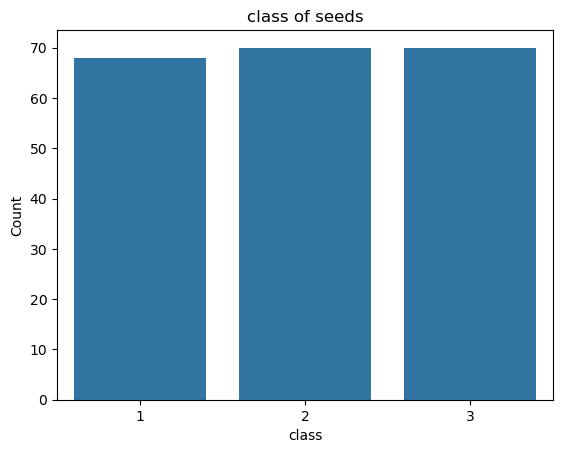

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("class of seeds")

In [5]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
2    70
3    70
1    68
Name: count, dtype: int64

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_8964\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


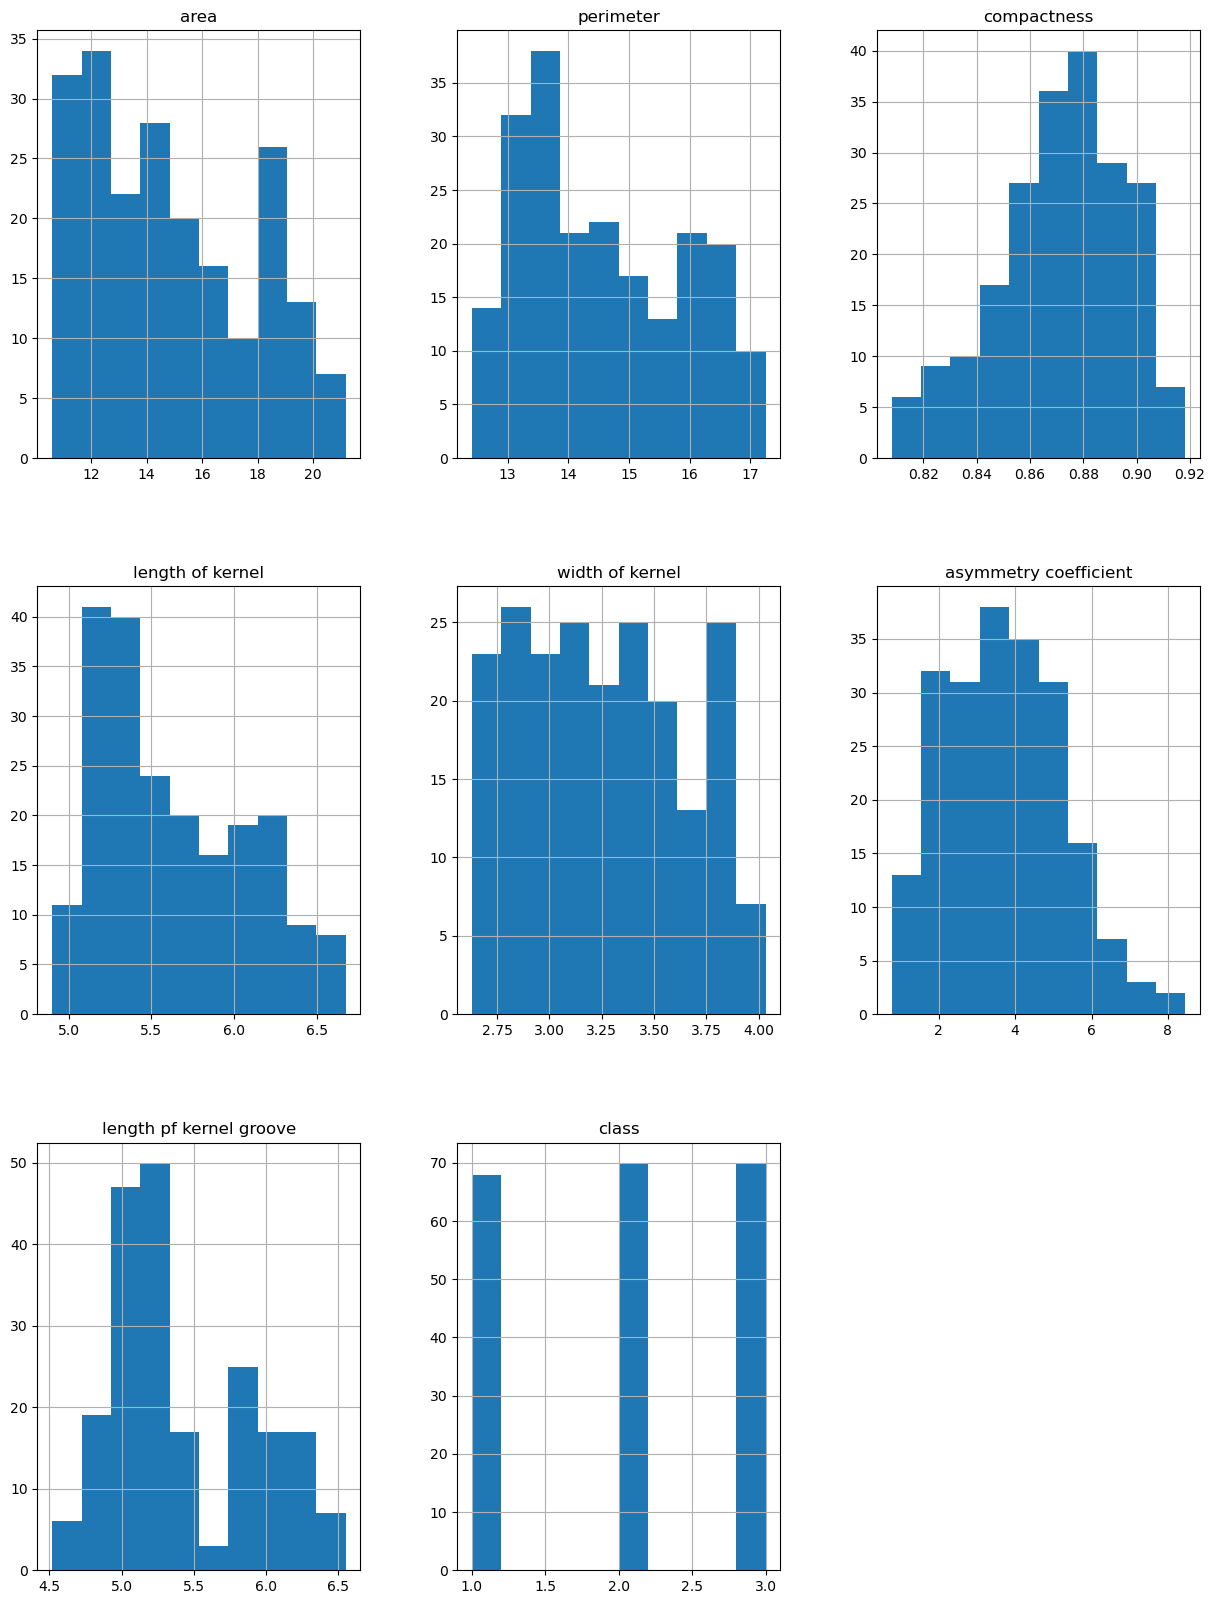

In [6]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [7]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length pf kernel groove',
       'class'],
      dtype='object')

In [8]:
X=df.drop('class', axis=1)

X.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length pf kernel groove
0,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
1,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
2,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
3,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
4,14.69,14.49,0.8799,5.563,3.259,3.586,5.219


In [9]:
y=df['class']
y.value_counts()

class
2    70
3    70
1    68
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(156, 7) (156,)
(52, 7) (52,)


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#모델 학습 효율 높이기 위한 StandardScaler
ss =StandardScaler()
ss.fit(X_train)
ss_train = ss.transform(X_train)
ss_test = ss.transform(X_test)
print(ss_train)

[[-1.15995442e+00 -1.06145134e+00 -1.73659834e+00 ... -1.51588004e+00
   3.86898896e-01 -5.37611584e-01]
 [-7.19780943e-01 -6.36057695e-01 -9.31556350e-01 ... -8.73939153e-01
  -3.07448456e-01 -3.31528701e-01]
 [ 1.95225334e-01  2.76605026e-01 -2.05877810e-02 ...  4.74157035e-04
   5.25633672e-01 -1.58752141e-01]
 ...
 [ 1.84847531e+00  1.86216314e+00  4.66674477e-01 ...  1.62513937e+00
  -4.71101615e-01  1.93538302e+00]
 [ 5.65880193e-02  1.37385289e-01 -1.05329043e-01 ...  4.27418699e-02
  -1.10012240e+00 -8.17312655e-02]
 [-1.34018293e+00 -1.18520221e+00 -2.55011446e+00 ... -1.58720681e+00
   9.55980867e-01 -4.27284384e-01]]


In [14]:
from sklearn.linear_model import LogisticRegression #선형 분류 모델
from sklearn.svm import SVC #비선형 분류 모델, 데이터셋 많을 시 시간 오래걸림
from sklearn.neural_network import MLPClassifier #다층 퍼셉트론을 구현한 모델, 비선형, 다중 클래스 분
from sklearn.tree import DecisionTreeClassifier #결정트리 기반 분류 알고리즘, 과적합 가능성 높음

from sklearn.metrics import accuracy_score #분류 모델의 정확도 평가, 객관적인 지표 중 하나
from sklearn.metrics import confusion_matrix #모델 성능 평가용 혼동 행렬 생성

In [15]:
clf_dt = DecisionTreeClassifier(random_state=0) #결정 트리 분류기
clf_dt.fit(ss_train, y_train)

pred_dt = clf_dt.predict(ss_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9423076923076923
[[15  2  0]
 [ 1 19  0]
 [ 0  0 15]]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9807692307692307
[[17  0  0]
 [ 1 19  0]
 [ 0  0 15]]


In [17]:
clf_lr = LogisticRegression(random_state=0) #로지스틱 회귀 분석 모델 생성
clf_lr.fit(ss_train, y_train) #모델 훈련

pred_lr = clf_lr.predict(ss_test) #모델 테스트

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))  #실제값인 y_test와 예측값인 pred_lr 확인->정확도
print (confusion_matrix(y_test, pred_lr)) # 얼마나 맞추고 어디서 틀렸는지


--- Logistic Regression Classifier ---
0.9423076923076923
[[16  0  1]
 [ 2 18  0]
 [ 0  0 15]]
